# 911 CapStoneProject

### This purpose of this project is to do some data analysis on this dataset, as well to see how accurate a model can get at predicted which 'type' of 911 comes through based on a set of features input. 

### Importing Packages

In [32]:
import seaborn as sns
import datetime 
import numpy as np
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import sklearn #(version == 1.2.2)
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Dataset

In [3]:
Data911 = pd.read_csv("911.csv")
Data911.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
Data911.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

#### Getting rid of NAs values

In [5]:
CleanData911 = Data911.dropna()
CleanData911

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


### EDA

##### Average Area of the 911 Calls

In [6]:
CleanData911['lat'].mean()

40.16051327436472

In [7]:
CleanData911['lng'].mean()

-75.31631130115736

In [8]:
CleanData911.describe()

,lat,lng,zip,e
count,86576.000000,86576.000000,86576.000000,86576.0
mean,40.160513,-75.316311,19237.659952,1.0
std,0.096151,0.179107,345.275446,0.0
min,30.333596,-95.595595,18036.000000,1.0
25%,40.102501,-75.398209,19038.000000,1.0
50%,40.145272,-75.301972,19401.000000,1.0
75%,40.232093,-75.206303,19446.000000,1.0
max,40.479853,-74.995041,77316.000000,1.0


In [9]:
CleanData911.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86576 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        86576 non-null  float64
 1   lng        86576 non-null  float64
 2   desc       86576 non-null  object 
 3   zip        86576 non-null  float64
 4   title      86576 non-null  object 
 5   timeStamp  86576 non-null  object 
 6   twp        86576 non-null  object 
 7   addr       86576 non-null  object 
 8   e          86576 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.6+ MB


In [10]:
Grouped911Calls = CleanData911.groupby("zip")["e"].count().reset_index(name="count")
Grouped911Calls = Grouped911Calls.sort_values(by="count",ascending = False)
Grouped911Calls.head(5)

,zip,count
67,19401.0,6977
85,19464.0,6641
68,19403.0,4854
79,19446.0,4745
70,19406.0,3173


In [11]:
GroupedTownCalls = CleanData911.groupby("twp")["e"].count().reset_index(name="count")
GroupedTownCalls = GroupedTownCalls.sort_values(by="count",ascending = False)
GroupedTownCalls.head(5)

,twp,count
25,LOWER MERION,7202
0,ABINGTON,5675
34,NORRISTOWN,5610
40,POTTSTOWN,4029
6,CHELTENHAM,3942


#### Unique number of 911 call titles

In [12]:
len(CleanData911["title"].unique())

107

#### Manipulate the dataframe

In [13]:
CleanData911['EMT Reason'] = CleanData911['title'].str.split(':').str[0]
CleanData911

C:\Users\MoJo\AppData\Local\Temp\ipykernel_4788\3026665824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData911['EMT Reason'] = CleanData911['title'].str.split(':').str[0]


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


In [14]:
CleanData911['EMT Reason2'] = CleanData911.apply(lambda row : row['title'].split(':')[0],axis = 1)

C:\Users\MoJo\AppData\Local\Temp\ipykernel_4788\4036113558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData911['EMT Reason2'] = CleanData911.apply(lambda row : row['title'].split(':')[0],axis = 1)


In [16]:
CleanData911.drop("EMT Reason2",axis = 1)
CleanData911

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,EMT Reason2
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,EMS
...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,EMS


In [19]:
del CleanData911['EMT Reason2']

KeyError: 'EMT Reason2'

In [20]:
CleanData911.groupby("EMT Reason")["e"].count()#reset_index(name="count")

EMT Reason
EMS        44318
Fire       13004
Traffic    29254
Name: e, dtype: int64

<Axes: xlabel='EMT Reason', ylabel='count'>

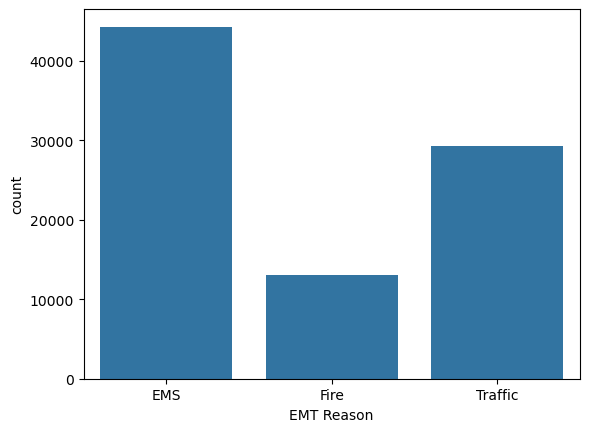

In [21]:
sns.countplot(x='EMT Reason',data=CleanData911)

In [23]:
CleanData911['timeStamp'] = pd.to_datetime(CleanData911['timeStamp'], format = '%Y-%m-%d %H:%M:%S')
#CleanData911

C:\Users\MoJo\AppData\Local\Temp\ipykernel_4788\747810738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData911['timeStamp'] = pd.to_datetime(CleanData911['timeStamp'], format = '%Y-%m-%d %H:%M:%S')


In [24]:
time = CleanData911['timeStamp'].iloc[0]
time.weekday()

3

In [25]:
CleanData911['Hour'] = CleanData911.apply(lambda row : row['timeStamp'].hour,axis = 1)
#CleanData911

C:\Users\MoJo\AppData\Local\Temp\ipykernel_4788\2640191836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData911['Hour'] = CleanData911.apply(lambda row : row['timeStamp'].hour,axis = 1)


In [26]:
CleanData911['Month'] = CleanData911.apply(lambda row : row['timeStamp'].month,axis = 1)
#CleanData911

C:\Users\MoJo\AppData\Local\Temp\ipykernel_4788\2969905595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData911['Month'] = CleanData911.apply(lambda row : row['timeStamp'].month,axis = 1)


In [27]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [28]:
CleanData911['Day of Week'] = CleanData911.apply(lambda row : row['timeStamp'].weekday(),axis = 1)
#CleanData911

C:\Users\MoJo\AppData\Local\Temp\ipykernel_4788\401324759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData911['Day of Week'] = CleanData911.apply(lambda row : row['timeStamp'].weekday(),axis = 1)


In [29]:
CleanData911['Day of Week'] = CleanData911['Day of Week'].map(dmap)
#CleanData911

C:\Users\MoJo\AppData\Local\Temp\ipykernel_4788\175302748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData911['Day of Week'] = CleanData911['Day of Week'].map(dmap)


<Axes: xlabel='Day of Week', ylabel='count'>

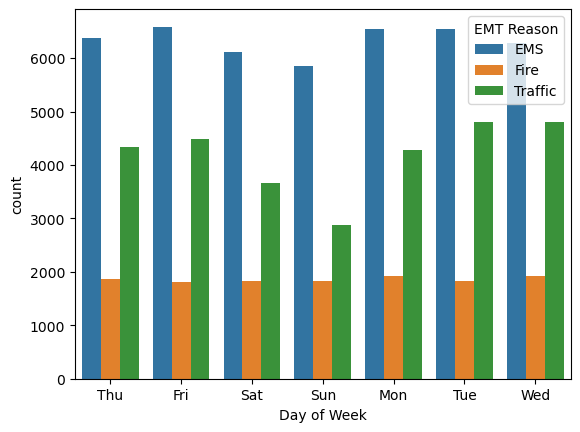

In [30]:
sns.countplot(x='Day of Week',hue = 'EMT Reason',data=CleanData911)

<Axes: xlabel='Month', ylabel='count'>

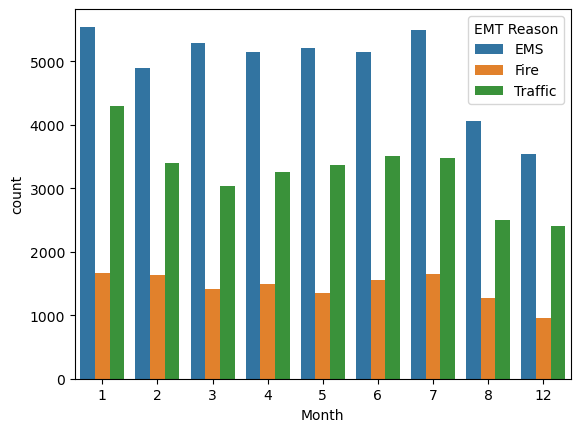

In [31]:
sns.countplot(x='Month',hue = 'EMT Reason',data=CleanData911)

#### Another Manipulation and More EDA

In [33]:
GroupByMonth = CleanData911.groupby("Month")["e"].count()
#GroupByMonth

In [34]:
GroupByMonthDF = GroupByMonth.to_frame()
#GroupByMonthDF

In [35]:
Tester = pd.DataFrame({'Count': GroupByMonth})
#Tester

In [36]:
GroupedByMonth = CleanData911.groupby("Month")["e"].count().reset_index(name="count")
GroupedByMonth = GroupedByMonth.sort_values(by="count",ascending = False)
#GroupedByMonth.head(5)

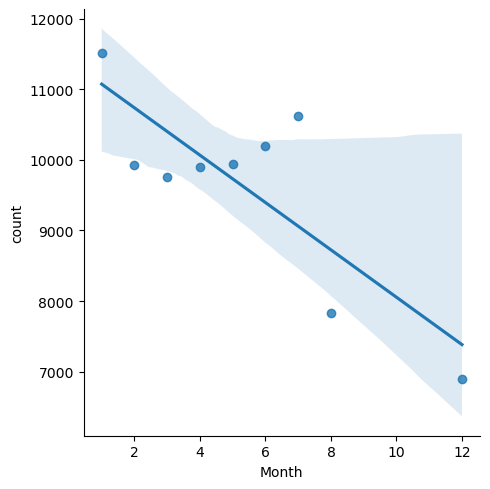

In [37]:
sns.lmplot(x="Month",y="count",data = GroupedByMonth)

In [38]:
byMonth = CleanData911.groupby('Month').count()
#byMonth

In [39]:
Test = byMonth.reset_index()
#Test

In [40]:
byMonth.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'EMT Reason', 'Hour', 'Day of Week'],
      dtype='object')

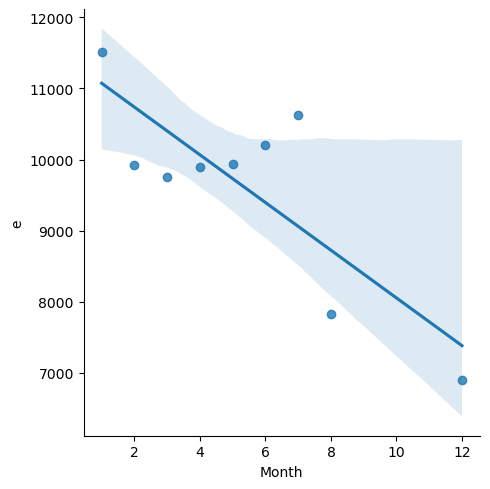

In [41]:
sns.lmplot(x="Month",y="e",data = Test)

In [42]:
CleanData911['Date'] = CleanData911.apply(lambda row : row['timeStamp'].date(),axis = 1)
CleanData911

C:\Users\MoJo\AppData\Local\Temp\ipykernel_4788\1250701910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CleanData911['Date'] = CleanData911.apply(lambda row : row['timeStamp'].date(),axis = 1)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Wed,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Wed,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wed,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wed,2016-08-24


In [43]:
byDate = CleanData911.groupby('Date').count()
#byDate

In [44]:
TestDate = byDate.reset_index()
#TestDate

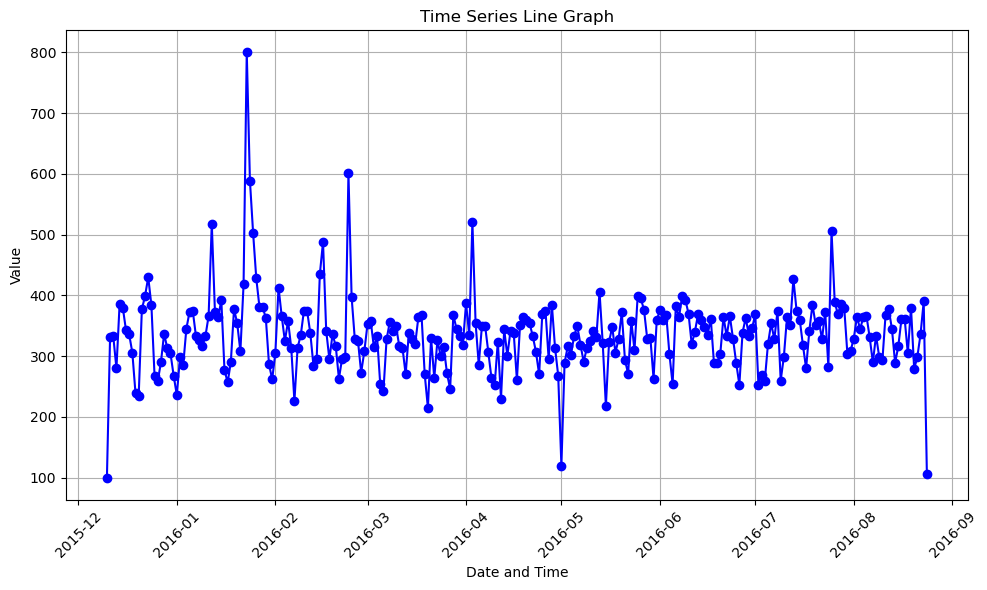

In [45]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)

# Plot the line graph
plt.plot(TestDate['Date'], TestDate['e'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Date and Time')
plt.ylabel('Value')
plt.title('Time Series Line Graph')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add grid lines (optional)
plt.tight_layout()  # Adjust layout for better appearance (optional)
plt.show()

#### 3 Plots

In [46]:
EMS = CleanData911[CleanData911['EMT Reason'] == 'EMS']
Fire = CleanData911[CleanData911['EMT Reason'] == 'Fire']
Traffic = CleanData911[CleanData911['EMT Reason'] == 'Traffic']

In [47]:
byDateEMS = EMS.groupby('Date').count()
byDateFire = Fire.groupby('Date').count()
byDateTraffic = Traffic.groupby('Date').count()

In [48]:
TestDateEMS = byDateEMS.reset_index()
TestDateFire = byDateFire.reset_index()
TestDateTraffic = byDateTraffic.reset_index()

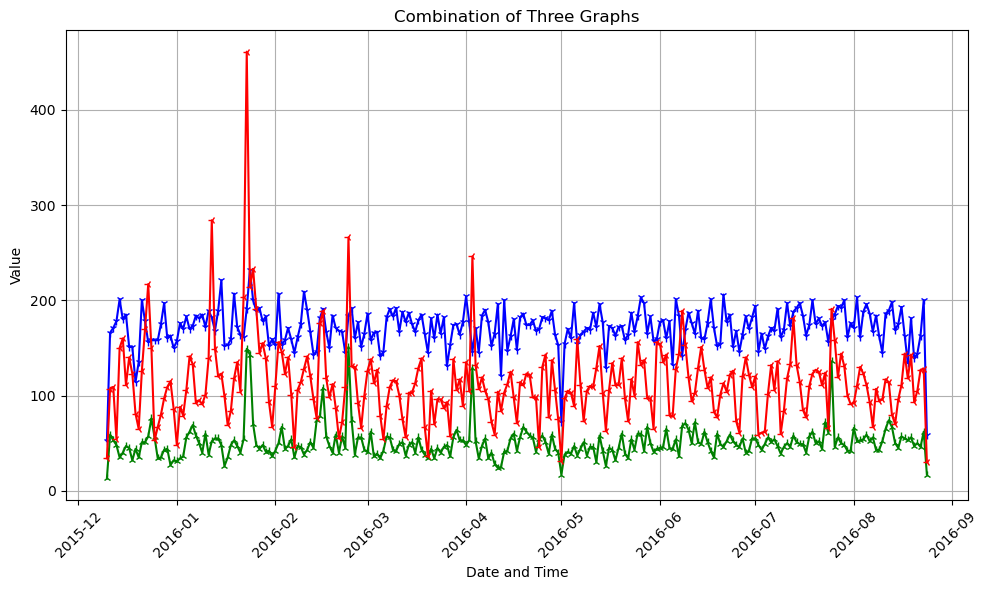

In [49]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)

# Plot the line graph
plt.plot(TestDateEMS['Date'], TestDateEMS['e'], marker='1', linestyle='-', color='b')

plt.plot(TestDateFire['Date'], TestDateFire['e'], marker='2', linestyle='-', color='g')

plt.plot(TestDateTraffic['Date'], TestDateTraffic['e'], marker='3', linestyle='-', color='r')

# Add labels and title
plt.xlabel('Date and Time')
plt.ylabel('Value')
plt.title('Combination of Three Graphs')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)  # Add grid lines (optional)
plt.tight_layout()  # Adjust layout for better appearance (optional)
plt.show()

In [50]:
byDayofWeek = CleanData911.groupby('Day of Week').count()
#byDayofWeek

In [51]:
column_to_move = 'Hour'
new_position = 0
columns = CleanData911.columns.tolist()
columns.remove(column_to_move)
columns.insert(new_position, column_to_move)
CleanData_Reordered = CleanData911[columns]
CleanData_Reordered

,Hour,lat,lng,desc,zip,title,timeStamp,twp,addr,e,EMT Reason,Month,Day of Week,Date
0,17,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,Thu,2015-12-10
1,17,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,Thu,2015-12-10
2,17,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,Thu,2015-12-10
3,17,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,Thu,2015-12-10
5,17,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,11,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,8,Wed,2016-08-24
99488,11,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,8,Wed,2016-08-24
99489,11,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,8,Wed,2016-08-24
99490,11,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,8,Wed,2016-08-24


In [52]:
byDayofWeek = CleanData_Reordered.groupby('Day of Week').count()
#byDayofWeek

In [53]:
Hours = CleanData_Reordered['Hour']
#Hours

In [54]:
dayHour = CleanData911.groupby(by=['Day of Week','Hour']).count()['EMT Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,248,200,165,164,184,166,319,525,636,663,...,806,839,897,825,714,616,569,491,445,400
Mon,243,198,183,173,185,222,338,547,723,689,...,759,776,837,845,762,654,547,443,410,294
Sat,324,265,226,212,202,205,227,352,416,566,...,674,677,705,649,678,613,549,508,450,402
Sun,335,280,245,228,199,214,251,342,434,554,...,608,588,555,608,574,559,464,419,365,283
Thu,251,180,200,144,162,167,293,495,685,733,...,758,827,790,867,706,610,543,472,356,307


<Axes: xlabel='Hour', ylabel='Hour'>

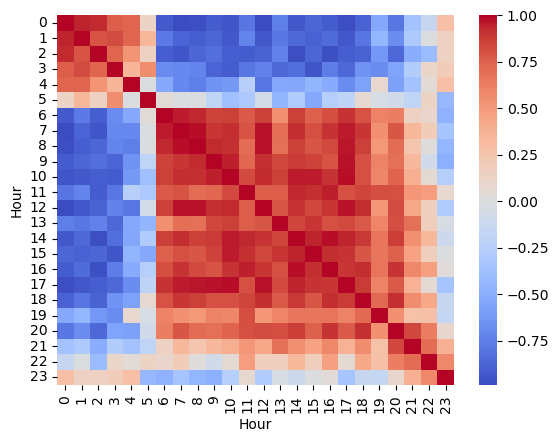

In [55]:
sns.heatmap(dayHour.corr(),cmap = 'coolwarm')

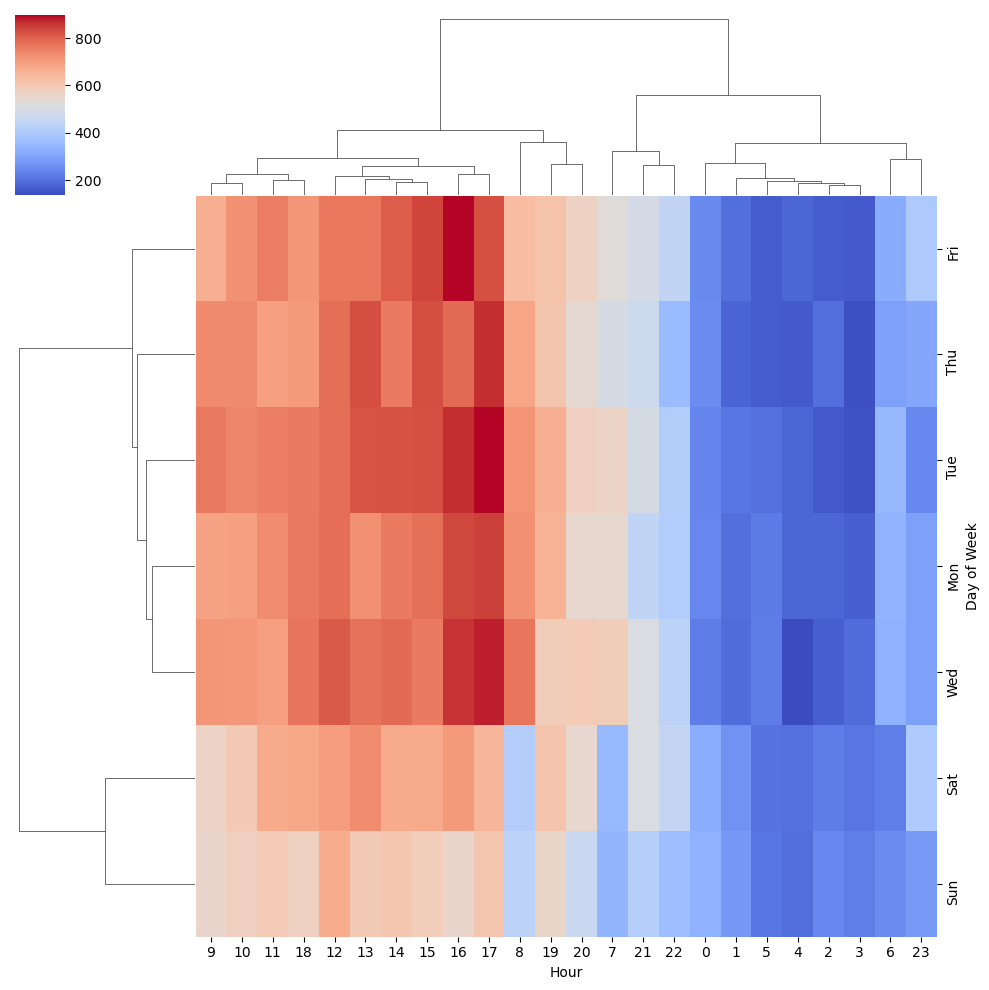

In [56]:
sns.clustermap(dayHour,cmap='coolwarm')

In [57]:
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,248,200,165,164,184,166,319,525,636,663,...,806,839,897,825,714,616,569,491,445,400
Mon,243,198,183,173,185,222,338,547,723,689,...,759,776,837,845,762,654,547,443,410,294
Sat,324,265,226,212,202,205,227,352,416,566,...,674,677,705,649,678,613,549,508,450,402
Sun,335,280,245,228,199,214,251,342,434,554,...,608,588,555,608,574,559,464,419,365,283
Thu,251,180,200,144,162,167,293,495,685,733,...,758,827,790,867,706,610,543,472,356,307
Tue,241,214,161,148,184,203,350,563,719,763,...,821,823,867,896,759,665,578,494,411,245
Wed,225,193,169,193,138,224,332,591,769,714,...,787,760,860,878,771,590,596,507,432,294


In [58]:
dayMonth = CleanData911.groupby(by=['Day of Week','Month']).count()['EMT Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1735,1360,1331,1683,1504,1429,1810,1123,905
Mon,1505,1658,1364,1401,1547,1395,1472,1315,1100
Sat,1979,1240,1110,1512,1264,1201,1507,955,831
Sun,1726,1058,973,1304,1230,1136,1440,878,805
Thu,1387,1391,1648,1390,1387,1800,1447,1038,1087


<Axes: xlabel='Month', ylabel='Month'>

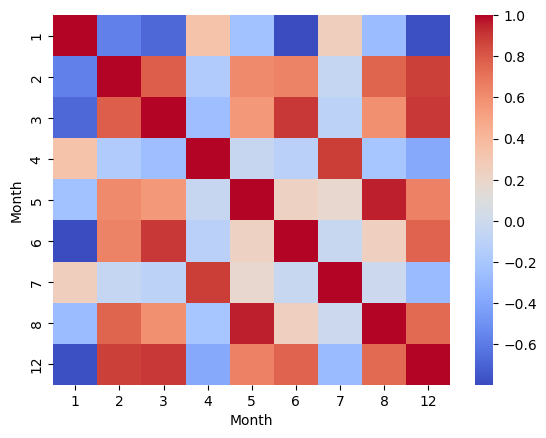

In [59]:
sns.heatmap(dayMonth.corr(),cmap = 'coolwarm')

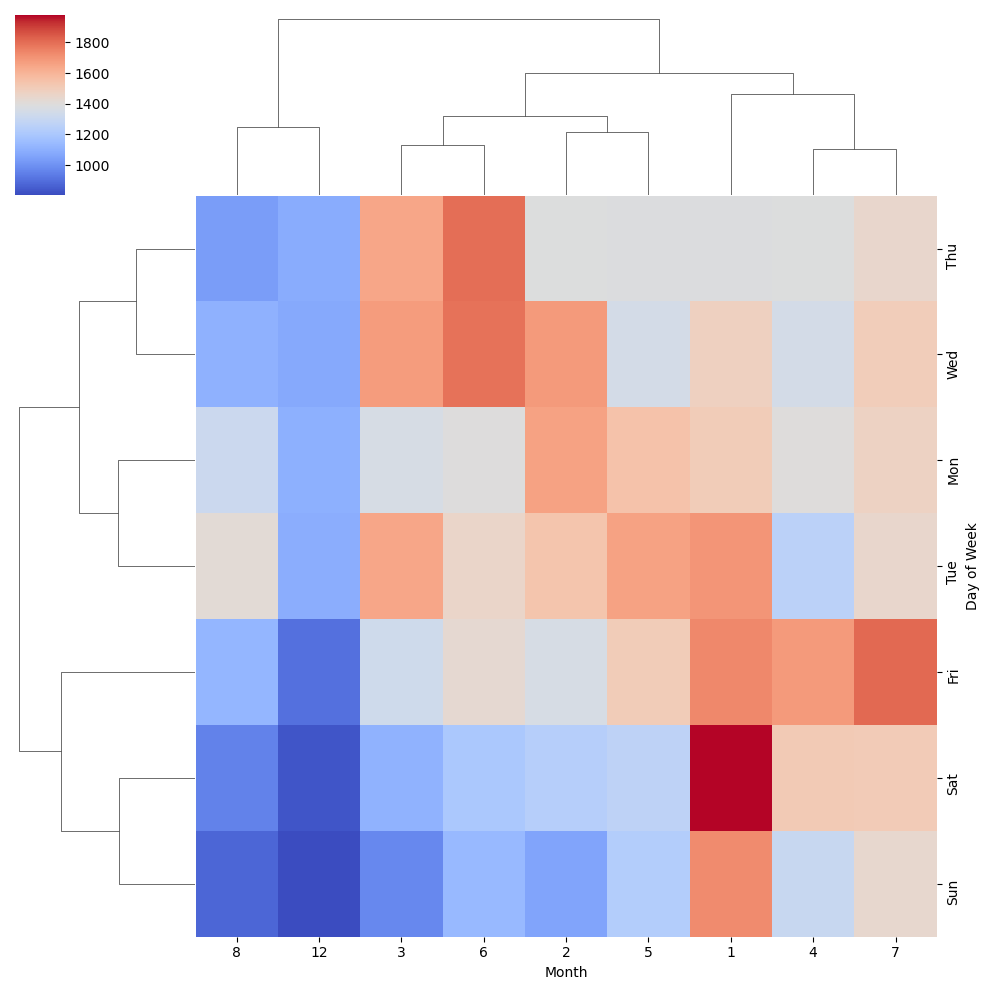

In [60]:
sns.clustermap(dayMonth,cmap='coolwarm')

### Predictions


#### I decided to take this project a step further by using some models to predict the amount of calls per month, where the calls take place, and the type of emergency calls. 

#### Decision Tree

#### The reason why I am using a decision tree as my classification model is because since there are only three categories of emergency calls, the model should be fairly accurate. 

In [61]:
ClusteredData = CleanData911.drop(["title","timeStamp"],axis = 1)
ClusteredData

,lat,lng,desc,zip,twp,addr,e,EMT Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Wed,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Wed,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wed,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wed,2016-08-24


In [62]:
Y = ClusteredData["EMT Reason"]
ClusteredData = ClusteredData.drop(["EMT Reason","desc","addr"],axis = 1)
ClusteredData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86576 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lat          86576 non-null  float64
 1   lng          86576 non-null  float64
 2   zip          86576 non-null  float64
 3   twp          86576 non-null  object 
 4   e            86576 non-null  int64  
 5   Hour         86576 non-null  int64  
 6   Month        86576 non-null  int64  
 7   Day of Week  86576 non-null  object 
 8   Date         86576 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 6.6+ MB


In [63]:
categorical_features = ClusteredData.select_dtypes(include=['object']).columns

In [64]:
one_hot_df = pd.get_dummies(ClusteredData, columns=categorical_features, )
one_hot_df

,lat,lng,zip,e,Hour,Month,twp_ABINGTON,twp_AMBLER,twp_BERKS COUNTY,twp_BRIDGEPORT,...,Date_2016-08-15,Date_2016-08-16,Date_2016-08-17,Date_2016-08-18,Date_2016-08-19,Date_2016-08-20,Date_2016-08-21,Date_2016-08-22,Date_2016-08-23,Date_2016-08-24
0,40.297876,-75.581294,19525.0,1,17,12,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,40.258061,-75.264680,19446.0,1,17,12,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,40.121182,-75.351975,19401.0,1,17,12,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,40.116153,-75.343513,19401.0,1,17,12,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,40.253473,-75.283245,19446.0,1,17,12,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,19401.0,1,11,8,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
99488,40.006974,-75.289080,19003.0,1,11,8,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
99489,40.115429,-75.334679,19401.0,1,11,8,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
99490,40.186431,-75.192555,19002.0,1,11,8,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [65]:
data, labels = one_hot_df, Y

In [66]:
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size = 0.2, random_state = 42)

In [67]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.55


In [69]:
TrueAccuracy = accuracy * 100
TrueAccuracy

54.92607992607993

#### Graph/Report of the Decision Tree Classifer Model

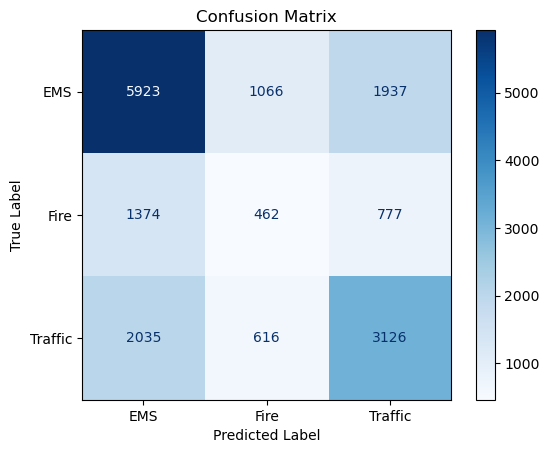

In [70]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
classes = np.unique(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [71]:
# Generate a classification report
report = classification_report(y_pred, y_test)
# Print the classification report
print(report)

              precision    recall  f1-score   support

         EMS       0.66      0.63      0.65      9332
        Fire       0.18      0.22      0.19      2144
     Traffic       0.54      0.54      0.54      5840

    accuracy                           0.55     17316
   macro avg       0.46      0.46      0.46     17316
weighted avg       0.56      0.55      0.56     17316



#### Decision Tree is performing at about 55%. Let's see if there are any other options as for classifying models.

### KNN Model

In [72]:
model = KNeighborsClassifier(n_neighbors = 3)

In [73]:
X_train

,lat,lng,zip,e,Hour,Month,twp_ABINGTON,twp_AMBLER,twp_BERKS COUNTY,twp_BRIDGEPORT,...,Date_2016-08-15,Date_2016-08-16,Date_2016-08-17,Date_2016-08-18,Date_2016-08-19,Date_2016-08-20,Date_2016-08-21,Date_2016-08-22,Date_2016-08-23,Date_2016-08-24
9346,40.270649,-75.270097,19440.0,1,6,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
68843,40.172739,-75.299967,19422.0,1,22,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24594,40.032328,-75.258797,19072.0,1,4,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76075,40.269202,-75.620262,19464.0,1,5,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
50133,40.319738,-75.610076,19525.0,1,3,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7217,40.175291,-75.296060,19422.0,1,18,12,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63018,40.073301,-75.308154,19428.0,1,9,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
88174,40.123466,-75.043277,19006.0,1,14,7,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1025,40.308269,-75.325139,18964.0,1,11,12,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [75]:
X_test

,lat,lng,zip,e,Hour,Month,twp_ABINGTON,twp_AMBLER,twp_BERKS COUNTY,twp_BRIDGEPORT,...,Date_2016-08-15,Date_2016-08-16,Date_2016-08-17,Date_2016-08-18,Date_2016-08-19,Date_2016-08-20,Date_2016-08-21,Date_2016-08-22,Date_2016-08-23,Date_2016-08-24
73969,40.149996,-75.309985,19422.0,1,16,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13656,40.184798,-75.286879,19422.0,1,10,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11402,40.125771,-75.194501,19034.0,1,9,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38461,40.105657,-75.344377,19405.0,1,18,3,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
20740,40.196656,-75.464645,19426.0,1,15,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53371,40.116135,-75.334257,19401.0,1,12,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
93472,40.116526,-75.340552,19401.0,1,19,8,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69965,40.302307,-75.634807,19525.0,1,13,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73834,40.124475,-75.338279,19401.0,1,8,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
preds = model.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.50


In [78]:
TrueAccuracy = accuracy * 100
TrueAccuracy

49.55532455532455

#### Report of the results of the KNN model k = 3

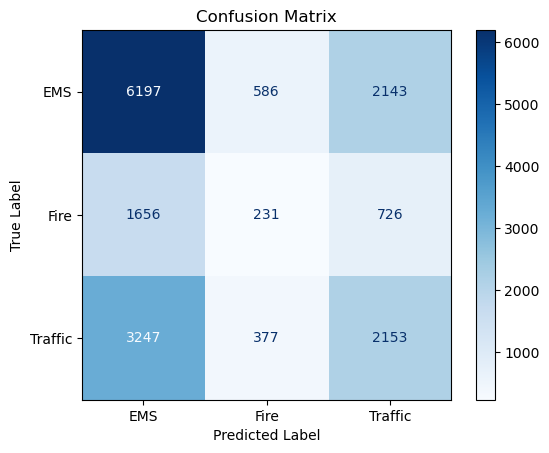

In [79]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, preds)

# Display confusion matrix as a heatmap
classes = np.unique(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [80]:
# Generate a classification report
report = classification_report(preds, y_test)

# Print the classification report
print(report)

              precision    recall  f1-score   support

         EMS       0.69      0.56      0.62     11100
        Fire       0.09      0.19      0.12      1194
     Traffic       0.37      0.43      0.40      5022

    accuracy                           0.50     17316
   macro avg       0.39      0.39      0.38     17316
weighted avg       0.56      0.50      0.52     17316



#### So the KNN does worse with with k = 3. Let's try and find the optimal k value to improve performance!

#### Optimal k-Values selection

In [81]:
k_values = range(3,9)


In [82]:
cross_val_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, data, Y, cv=5)  # 5-fold cross-validation
    cross_val_scores.append(np.mean(scores))

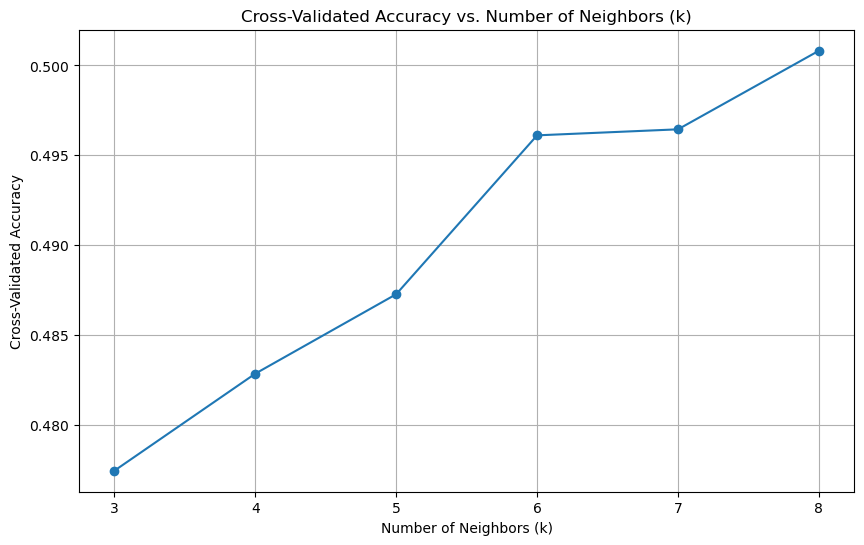

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, cross_val_scores, marker='o', linestyle='-')
plt.title('Cross-Validated Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.show()

In [84]:
optimal_k = k_values[np.argmax(cross_val_scores)]
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [85]:
predictions = knn_classifier.predict(X_test)

In [86]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.52


In [87]:
TrueAccuracy = accuracy * 100
TrueAccuracy

51.80180180180181

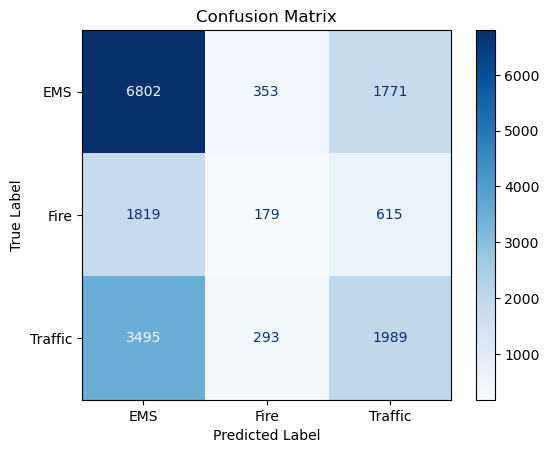

In [88]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display confusion matrix as a heatmap
classes = np.unique(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [89]:
# Generate a classification report
report = classification_report(predictions, y_test)

# Print the classification report
print(report)

              precision    recall  f1-score   support

         EMS       0.76      0.56      0.65     12116
        Fire       0.07      0.22      0.10       825
     Traffic       0.34      0.45      0.39      4375

    accuracy                           0.52     17316
   macro avg       0.39      0.41      0.38     17316
weighted avg       0.62      0.52      0.56     17316



#### So as you can the accuracy still has not reached an overall value of 60%.

### Neural Networks

In [90]:
ClusteredData

,lat,lng,zip,twp,e,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,19525.0,NEW HANOVER,1,17,12,Thu,2015-12-10
1,40.258061,-75.264680,19446.0,HATFIELD TOWNSHIP,1,17,12,Thu,2015-12-10
2,40.121182,-75.351975,19401.0,NORRISTOWN,1,17,12,Thu,2015-12-10
3,40.116153,-75.343513,19401.0,NORRISTOWN,1,17,12,Thu,2015-12-10
5,40.253473,-75.283245,19446.0,LANSDALE,1,17,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,19401.0,NORRISTOWN,1,11,8,Wed,2016-08-24
99488,40.006974,-75.289080,19003.0,LOWER MERION,1,11,8,Wed,2016-08-24
99489,40.115429,-75.334679,19401.0,NORRISTOWN,1,11,8,Wed,2016-08-24
99490,40.186431,-75.192555,19002.0,HORSHAM,1,11,8,Wed,2016-08-24


In [91]:
Y

0            EMS
1            EMS
2           Fire
3            EMS
5            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: EMT Reason, Length: 86576, dtype: object

In [92]:
categorical_features = ClusteredData.select_dtypes(include=['object']).columns

one_hot_df = pd.get_dummies(ClusteredData, columns=categorical_features, )
one_hot_df

data, labels = one_hot_df, Y

In [93]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.3, random_state=42)

In [94]:
# Standardize features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
# One-hot encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_train_one_hot = keras.utils.to_categorical(y_train_encoded, num_classes=3)
y_test_one_hot = keras.utils.to_categorical(y_test_encoded, num_classes=3)

#### Activation function is relu with 4 layers in total for the neural network

In [96]:
# Create a neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(339,)),               # Input layer (4 features)
    keras.layers.Dense(64, activation='relu'),   # Hidden layer with ReLU activation
    keras.layers.Dense(32, activation='relu'),   # Hidden layer with ReLU activation
    keras.layers.Dense(3, activation='softmax')  # Output layer with softmax for 3 classes
])

#### The optimizer is AdAM - with 100 epochs

In [97]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_one_hot, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
3788/3788 [==============================] - 6s 1ms/step - loss: 0.9864 - accuracy: 0.5158
Epoch 2/100
3788/3788 [==============================] - 4s 932us/step - loss: 0.9578 - accuracy: 0.5346
Epoch 3/100
3788/3788 [==============================] - 4s 947us/step - loss: 0.9494 - accuracy: 0.5401
Epoch 4/100
3788/3788 [==============================] - 4s 936us/step - loss: 0.9400 - accuracy: 0.5486
Epoch 5/100
3788/3788 [==============================] - 4s 985us/step - loss: 0.9304 - accuracy: 0.5554
Epoch 6/100
3788/3788 [==============================] - 6s 1ms/step - loss: 0.9207 - accuracy: 0.5614
Epoch 7/100
3788/3788 [==============================] - 5s 1ms/step - loss: 0.9113 - accuracy: 0.5673
Epoch 8/100
3788/3788 [==============================] - 5s 1ms/step - loss: 0.9020 - accuracy: 0.5736
Epoch 9/100
3788/3788 [==============================] - 5s 1ms/step - loss: 0.8930 - accuracy: 0.5760
Epoch 10/100
3788/3788 [==============================] - 5s 1ms/

In [98]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

812/812 [==============================] - 1s 791us/step - loss: 1.3809 - accuracy: 0.4811
Test accuracy: 48.11%


#### It seems that Neural nets does not predict 911 calls any better than any of the other models it seems 

## Conclusion

### I believe that the best a model can do at predicting what category a certain 911 call falls under is about 50% (At my knowledge level). There are just too many factors to narrow down which ones are important, and tuning hyperparameters can only improve a model so much without affecting mutli-collinearity. 